In [1]:
# Importing basic, necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing NLP libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
# Importing Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Loading Dataset
df = pd.read_csv("bbc_news.csv")
df.shape

(2127, 7)

In [5]:
# Printing Sample data
print("Sample Data (first 5 rows):")
df.head()

Sample Data (first 5 rows):


,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...


In [6]:
print("Sample Data (last 5 rows):")
df.tail()

Sample Data (last 5 rows):


,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
2122,New consoles promise big problems\n\nMaking ga...,tech,52,60.85,9.20,Instead of employing lots of artists to create...,Mr Wright said that enabling players to devise...
2123,BT program to beat dialler scams\n\nBT is intr...,tech,17,56.29,9.23,If a bill rises substantially above its usual ...,BT is introducing two initiatives to help beat...
2124,Be careful how you code\n\nA new European dire...,tech,45,56.29,8.73,"If it gets its way, the Dutch government will ...",A new European directive could put software wr...
2125,US cyber security chief resigns\n\nThe man mak...,tech,16,47.42,9.14,Amit Yoran was director of the National Cyber ...,The man making sure US computer networks are s...
2126,Losing yourself in online gaming\n\nOnline rol...,tech,149,68.91,7.15,One unnamed correspondent - all are anonymous ...,"Shame they are getting more popular, as you kn..."


In [7]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

In [8]:
# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['labels']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model: Naive Bayes
Accuracy: 0.9694835680751174
Classification Report:
                precision    recall  f1-score   support

     business       0.97      0.98      0.98       104
entertainment       0.99      0.90      0.94        78
     politics       0.91      1.00      0.95        73
        sport       1.00      1.00      1.00        98
         tech       0.97      0.96      0.97        73

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426



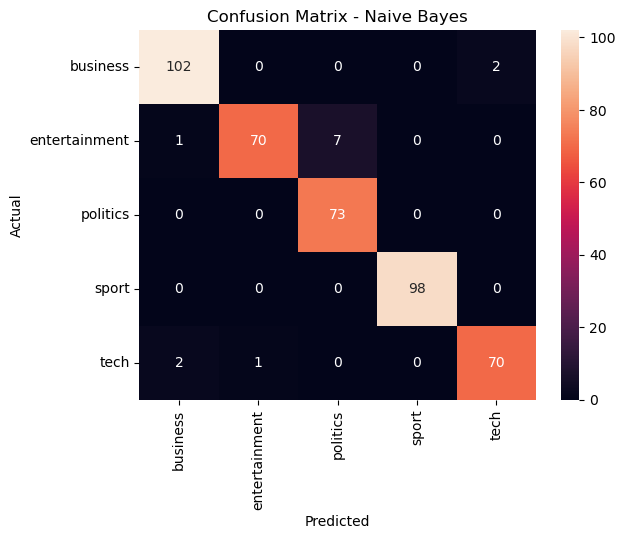


Model: Logistic Regression
Accuracy: 0.9812206572769953
Classification Report:
                precision    recall  f1-score   support

     business       0.99      0.98      0.99       104
entertainment       0.99      0.94      0.96        78
     politics       0.95      1.00      0.97        73
        sport       1.00      1.00      1.00        98
         tech       0.97      0.99      0.98        73

     accuracy                           0.98       426
    macro avg       0.98      0.98      0.98       426
 weighted avg       0.98      0.98      0.98       426



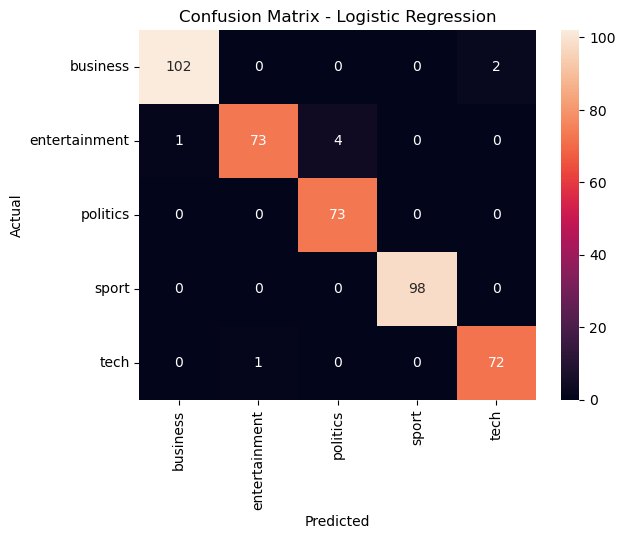

C:\Users\Nilanjana\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Model: SVM
Accuracy: 0.9788732394366197
Classification Report:
                precision    recall  f1-score   support

     business       0.99      0.96      0.98       104
entertainment       0.97      0.95      0.96        78
     politics       0.96      1.00      0.98        73
        sport       1.00      1.00      1.00        98
         tech       0.96      0.99      0.97        73

     accuracy                           0.98       426
    macro avg       0.98      0.98      0.98       426
 weighted avg       0.98      0.98      0.98       426



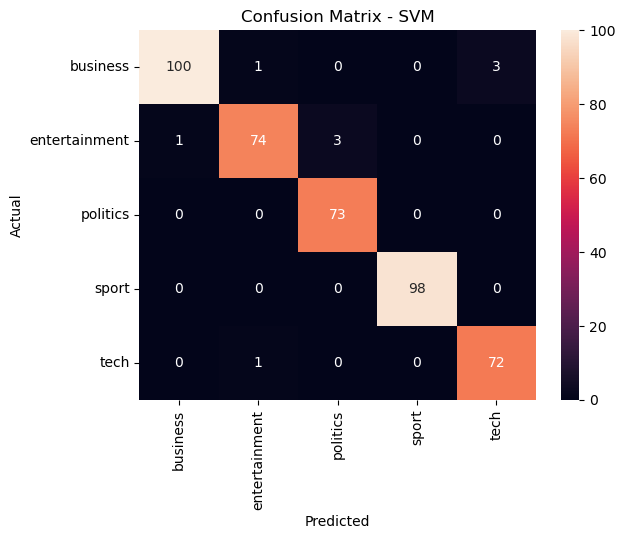

In [9]:
# Model Training & Evaluation
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=y.unique())
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()